Chapter 08

# 三维绕轴旋转
《线性代数》 | 鸢尾花书：数学不难

这段代码从数学角度展示了**三维旋转变换**对单位立方体的几何影响，使用了经典的三维旋转矩阵，分别绕$x_1$轴、$x_2$轴、$x_3$轴旋转一个固定角度 $\theta = \frac{\pi}{6}$（即30度）。核心思想是：**将立方体的所有顶点作为三维向量，通过矩阵乘法实现旋转**。我们用三维线性代数中的旋转矩阵将单位立方体的点集 $\mathbf{p}$ 映射为新坐标系下的点集 $\mathbf{p'}$，即：

$$
\mathbf{p'} = R \cdot \mathbf{p}
$$

这里 $R$ 是旋转矩阵，$\mathbf{p}$ 是一个 $8 \times 3$ 的矩阵，每一行是立方体的一个顶点。



首先，使用 `numpy` 和 `matplotlib` 进行初始化，其中 `cube` 定义了单位立方体的8个顶点，坐标为 $[0, 0, 0]$ 到 $[1, 1, 1]$，排列顺序遵循标准三维空间立方体的角点布局。



然后，对立方体依次施加三种不同的旋转。每一次旋转都定义了一个旋转矩阵 $R$，该矩阵是一个 $3 \times 3$ 的标准**正交矩阵**，用来表达绕某个轴的刚性变换。具体形式如下：

- 绕 $x_1$（x 轴）旋转 $\theta$，使用的旋转矩阵是：

$$
R_{x_1} = \begin{bmatrix}
1 & 0 & 0 \\
0 & \cos\theta & -\sin\theta \\
0 & \sin\theta & \cos\theta
\end{bmatrix}
$$

这个矩阵作用在每个顶点上时，只会改变其 $x_2$ 和 $x_3$ 坐标，而 $x_1$ 分量保持不变。直观上，整个立方体绕水平轴进行旋转。


- 绕 $x_2$（y 轴）旋转 $\theta$，使用矩阵：

$$
R_{x_2} = \begin{bmatrix}
\cos\theta & 0 & \sin\theta \\
0 & 1 & 0 \\
-\sin\theta & 0 & \cos\theta
\end{bmatrix}
$$

这会保留 $x_2$ 分量，旋转 $x_1$ 与 $x_3$ 方向。立方体绕竖直方向横向旋转，表现为从正面斜向转动。



- 绕 $x_3$（z 轴）旋转 $\theta$，使用矩阵：

$$
R_{x_3} = \begin{bmatrix}
\cos\theta & -\sin\theta & 0 \\
\sin\theta & \cos\theta & 0 \\
0 & 0 & 1
\end{bmatrix}
$$

这是二维旋转矩阵在三维空间中的扩展，保留 $x_3$ 分量，只旋转平面 $x_1$ 和 $x_2$ 方向，立方体在视图中绕自身垂直轴转动。



每个旋转过程都将原始立方体点集与旋转矩阵 $R^\top$ 进行矩阵乘法，即：

$$
\mathbf{P}_{\text{rotated}} = \mathbf{P}_{\text{original}} \cdot R^\top
$$

这里用 `.T` 是因为原始点按“每一行一个点”组织，为了与列向量形式的线性代数一致，需使用转置。



函数 `plot_cube` 统一用于可视化旋转前后的立方体。它绘制了两个立方体的框线：变换前为灰色虚线，变换后为黑色实线；每个顶点也被用彩色圆点标出。边的连接方式由 `edges` 列表定义，确保12条边按逻辑连接8个顶点。



坐标轴被设置为正交投影 (`ortho`)，防止透视造成的视觉扭曲；三轴范围固定在 $[-2, 2]$，统一视角角度方便对比变换效果。



总结来看，这段代码以三维立方体为例，从数值和图形两方面生动演示了**绕三轴旋转的几何效果**，帮助理解三维旋转矩阵的结构与作用，是线性代数与图形学融合的经典案例。

## 初始化

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## 可视化函数

In [5]:
def plot_cube(ax, original_cube, transformed_cube):
    colors = original_cube

    # 定义每个卦限的框线顶点对
    edges = [[0, 1], [1, 2], [2, 3], [3, 0], 
             [0, 4], [1, 5], [2, 6], [3, 7],
             [4, 5], [5, 6], [6, 7], [7, 4]]
    
    # 绘制原始立方体框线
    for edge in edges:
        ax.plot(*zip(*original_cube[edge]), color="gray", linestyle="dotted")
    
    # 绘制变换后的立方体框线
    for edge in edges:
        ax.plot(*zip(*transformed_cube[edge]), color="black", linestyle="-")
    
    # 绘制顶点
    ax.scatter(original_cube[:,0], original_cube[:,1], original_cube[:,2], 
               facecolor=colors, s=50, marker='o', edgecolor='k')
    ax.scatter(transformed_cube[:,0], transformed_cube[:,1], transformed_cube[:,2], 
               facecolor=colors, s=50, marker='o', edgecolor='k')    

    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_zlim(-2, 2)
    ax.axis(False)
    ax.set_box_aspect([1, 1, 1])  # 确保 x, y, z 轴比例相同
    ax.view_init(elev=30, azim=30)  # 统一视角
    ax.set_proj_type('ortho')  # 设置为正交投影
    ax.plot((-2,2),(0,0),(0,0),color = 'k')
    ax.plot((0,0),(-2,2),(0,0),color = 'k')
    ax.plot((0,0),(0,0),(-2,2),color = 'k')
    

## 定义单位立方体的 8 个顶点坐标

In [7]:
cube = np.array([[0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0],
                 [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1]])

## 绕 x1 轴旋转

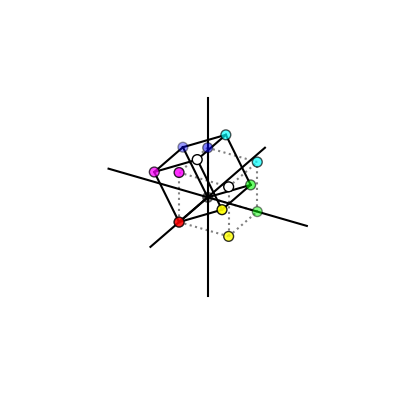

In [24]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')

theta_1 = np.pi / 6
R_x1 = np.array([[1, 0, 0], 
                 [0, np.cos(theta_1), -np.sin(theta_1)], 
                 [0, np.sin(theta_1), np.cos(theta_1)]])

rotated_cube = cube @ R_x1.T 

plot_cube(ax, cube, rotated_cube)
plt.savefig('1.svg')

## 绕 x2 轴旋转

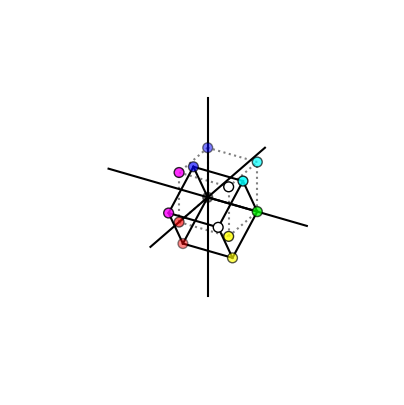

In [26]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')

theta_2 = np.pi / 6
R_x2 = np.array([[np.cos(theta_2), 0, np.sin(theta_2)], 
                 [0, 1, 0], 
                 [-np.sin(theta_2), 0, np.cos(theta_2)]])
rotated_cube = cube @ R_x2.T 
plot_cube(ax, cube, rotated_cube)
plt.savefig('2.svg')

## 绕 x3 轴旋转

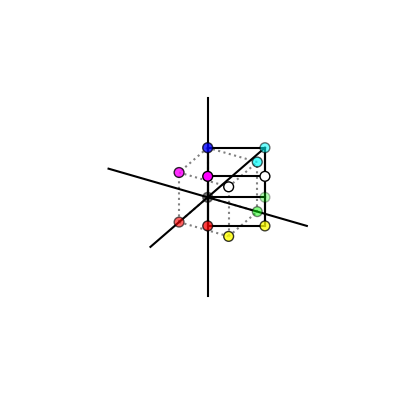

In [30]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')

theta_3 = np.pi / 6
R_x3 = np.array([[np.cos(theta_3), -np.sin(theta_3), 0], 
                 [np.sin(theta_3), np.cos(theta_3), 0], 
                 [0, 0, 1]])

rotated_cube = cube @ R_x3.T 
plot_cube(ax, cube, rotated_cube)


作者	**生姜DrGinger**  
脚本	**生姜DrGinger**  
视频	**崔崔CuiCui**  
开源资源	[**GitHub**](https://github.com/Visualize-ML)  
平台	[**油管**](https://www.youtube.com/@DrGinger_Jiang)		
		[**iris小课堂**](https://space.bilibili.com/3546865719052873)		
		[**生姜DrGinger**](https://space.bilibili.com/513194466)  